In [4]:
import scipy as sp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [5]:
dg = pd.read_csv('data.csv')
dg

,feature1,feature2,feature3,target
0,-0.570563,1.420342,0.495580,-9.763182
1,-0.990563,0.556965,1.045064,-24.029355
2,-0.674728,0.150617,1.774645,45.616421
3,0.388250,-0.387127,-0.110229,34.135737
4,1.167882,-0.024104,0.145063,86.663647
...,...,...,...,...
195,0.255081,-0.231497,-0.239632,38.067836
196,0.276068,-0.648411,-0.077441,12.812755
197,0.122250,-1.157383,0.765721,70.454115
198,-0.914822,-0.897140,-0.784205,-93.235783


In [6]:
X = dg[['feature1', 'feature2', 'feature3']].values
y = dg['target'].values

In [7]:
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size = 0.3, random_state = 42)

In [8]:
model = LinearRegression()
model.fit(Xtrain,ytrain)

LinearRegression()

In [9]:
ypred = model.predict(Xtest)
res = ypred  - ytest

## So the *Residuals* must follow the **Normal Distribution**

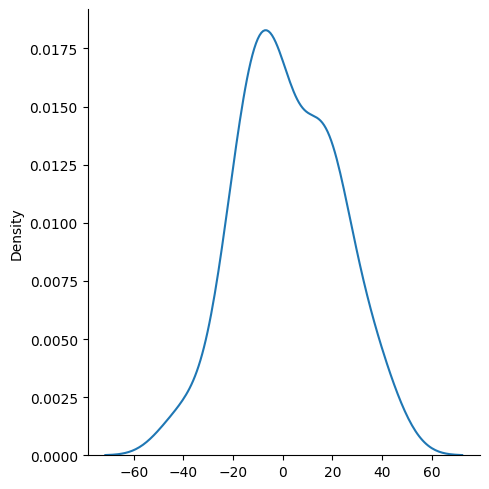

In [10]:
sns.displot(res, kind = 'kde')

##The QQ plots are used to assess the normality of residuals in regression analysis.

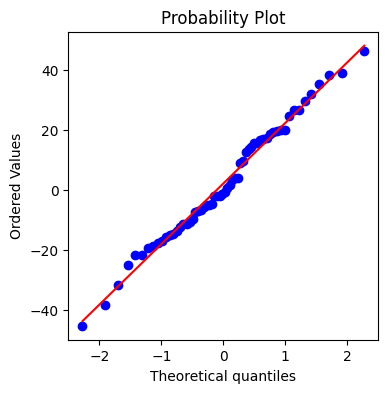

In [11]:
#QQ plot

fig, ax = plt.subplots(figsize = (4,4))
sp.stats.probplot(res, plot = ax, fit = True)
plt.show()

From the figure one can observe that the first and upto some level the third figure follows Linear relationship while the second one does not

Text(0.5, 1.0, 'Feature3')

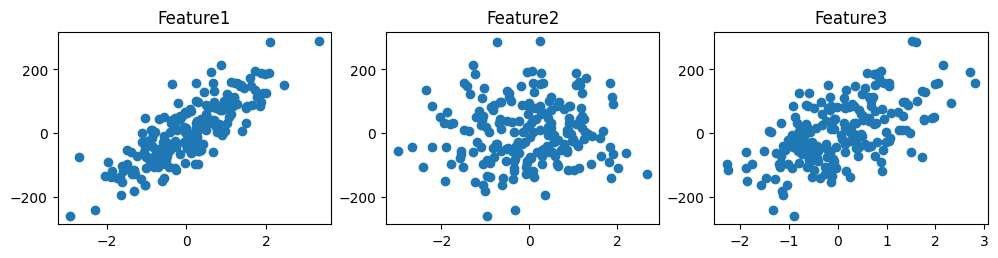

In [12]:
fig, (ax1,ax2,ax3) = plt.subplots(ncols = 3, figsize= (12,2.5))
ax1.scatter(dg['feature1'],dg['target'])
ax1.set_title('Feature1')
ax2.scatter(dg['feature2'],dg['target'])
ax2.set_title('Feature2')
ax3.scatter(dg['feature3'],dg['target'])
ax3.set_title('Feature3')

# **MultiCollinearity**
Multicollinearity occurs when independent variables in a regression model are highly correlated.
The independent variables should **NOT** be highly correlated with each other

#Two Ways to check it
1. VIF()
2. Corr()

# **Variance Inflation Factor**
(VIF) which show the relation among different features

In [13]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF

vif = []

for i in range(Xtrain.shape[1]):
  vif.append(VIF(Xtrain,i))

In [14]:
dff = pd.DataFrame({'vif':vif},index = dg.columns[0:3]).T
dff

,feature1,feature2,feature3
vif,1.001471,1.014364,1.012964


# **Correlation Matrix**
(Corr) between the first three variables in the dataset

<Axes: >

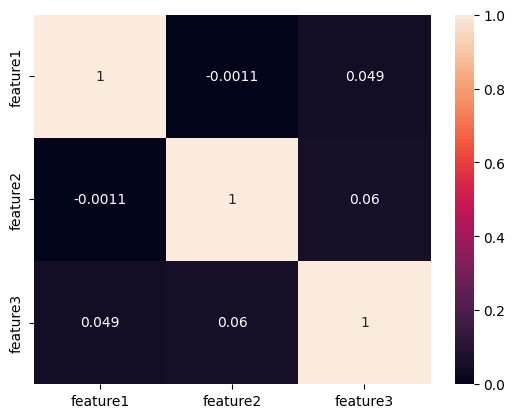

In [15]:
sns.heatmap(dg.iloc[:,0:3].corr() ,annot = True)

# **Homoscedasticity**
we plot the y_prediction on x axis and then plot the residuals <br>such that the residuals must be evenly distributed across the y_prediction

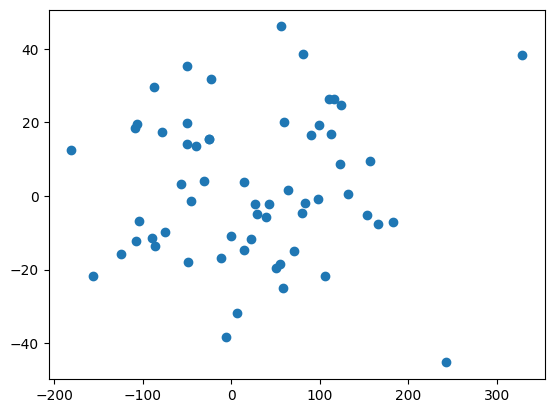

In [16]:
plt.scatter(ypred, res)

## **No Autocorrelation between the residuals**
The residuals should be **independent** of each other, meaning that there should be no **systematic** patterns in the residuals.

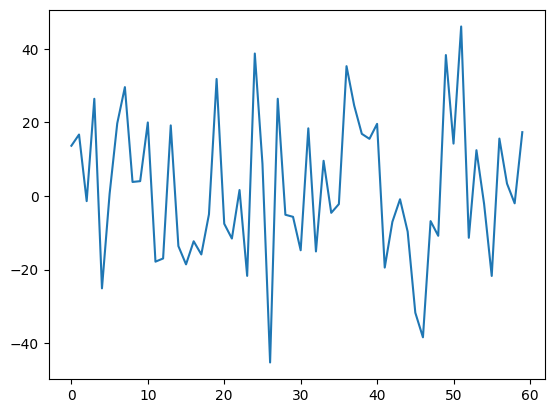

In [17]:
plt.plot(res)